In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import sys
import os
import tqdm
import gc
import copy

from collections import defaultdict
import itertools

import plotly as ply
ply.io.renderers.default="notebook"

import ipywidgets as widgets
from ipywidgets import interact

import sklearn as skl
from sklearn.neighbors import KernelDensity

import gridData
from gridData import Grid

In [6]:
pmeVolData_neg200mV=Grid("CX26_neg200mV_last40ns_PME.dx")
pmeVolData_pos200mV=Grid("p200mV.PME.dx")
pmeVolData_neg200mV

<<class 'gridData.core.Grid'> with (128, 128, 168) bins>

In [4]:
dir(pmeVolData)

['_Grid__interpolated',
 '_Grid__interpolation_spline_order',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_export_dx',
 '_export_python',
 '_exporters',
 '_get_exporter',
 '_get_loader',
 '_guess_format',
 '_interpolationFunctionFactory',
 '_len_edges',
 '_load_cpp4',
 '_load_dx',
 '_load_plt',
 '_load_python',
 '_loaders',
 '_map_edges',
 '_max_edges',
 '_midpoints',
 '_min_edges',
 '_update',
 'centers',
 'check_compatible',
 'default_format',
 'delta',
 'edges',
 'export'

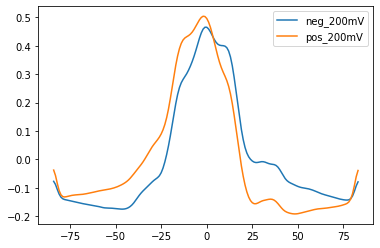

In [8]:
kb=8.617333262E-5
tSim=310.15
kbT=kb*tSim
sns.lineplot(np.arange(168)-168/2,
             kbT*np.mean(pmeVolData_neg200mV.grid,axis=(0,1)),
             label='neg_200mV')
sns.lineplot(np.arange(168)-168/2,
             kbT*np.mean(pmeVolData_pos200mV.grid,axis=(0,1)),
             label='pos_200mV')
plt.show()

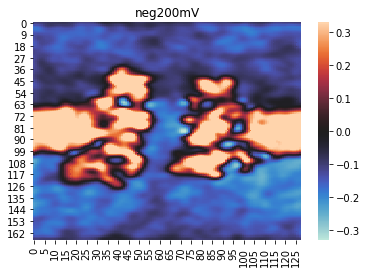

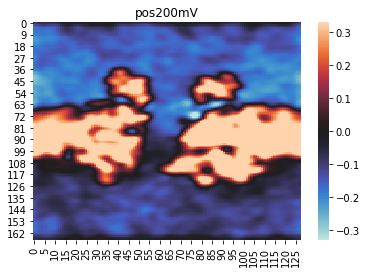

In [49]:
negCrossSect=np.rot90(kbT*pmeVolData_neg200mV.grid[:,64,:])
vcut=np.abs(np.min([
    np.max(negCrossSect),
    np.min(negCrossSect)
]))
sns.heatmap(negCrossSect,center=0,
            vmin=-vcut,vmax=vcut
           )
plt.title('neg200mV')
plt.show()

posCrossSect=np.rot90(kbT*pmeVolData_pos200mV.grid[:,64,:])
vcut=np.abs(np.min([
    np.max(negCrossSect),
    np.min(negCrossSect)
]))
sns.heatmap(posCrossSect,center=0,
            vmin=-vcut,vmax=vcut
           )
plt.title('pos200mV')
plt.show()

In [40]:
?sns.heatmap